# Ajuste de curvas

O problema básico é: dado um conjunto de pontos $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$, queremos encontrar uma **reta** (mais tarde veremos como ajustar funções mais gerais...) que **seja o mais próxima possível** desses pontos. Ou seja, queremos encontrar *parâmetros* $a$ e $b$ tais que

$$ f(x; a, b) = ax + b $$

aproxime bem o conjunto de pontos $\{(x_i, y_i)\}$.

Este tipo de problema é comum em todas as áreas da ciência: dadas certos dados empíricos, e uma lei ou fórmula (geralmente derivada da teoria), queremos encontrar valores para os coeficientes / constantes. Um exemplo muito comum nos cursos de física básica é o cálculo da aceleração da gravidade a partir do período de oscilação de um pêndulo simples.


## Exercício 0

Como podemos fazer esse ajuste? Uma forma simples, mas pouco rigorosa ou sistemática, é fazê-lo visualmente. Vamos ver um exemplo. **Varie os valores de $a$ e $b$ abaixo** até encontrar uma reta que pareça um bom ajuste. Lembre-se que queremos que o ajuste contemple *todos* os pontos, e que a reta não tenha "viés", para cima ou para baixo.

Note que, a menos que haja apenas 2 pontos, é impossível fazer com que a reta cruze todos os pontos.

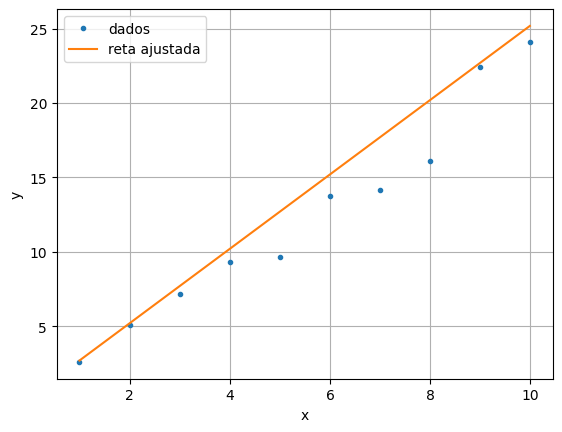

In [2]:
import numpy as np
from matplotlib import pyplot as pt

dados = np.array(
    [
        [1.0, 2.607],
        [2.0, 5.062],
        [3.0, 7.163],
        [4.0, 9.286],
        [5.0, 9.671],
        [6.0, 13.774],
        [7.0, 14.173],
        [8.0, 16.134],
        [9.0, 22.412],
        [10.0, 24.127],
    ]
)

x = np.arange(1, 10.0, 0.01)
# varie os valores de a e b
a = 2.5
b = 0.2
y = a * x + b

pt.plot(dados[:, 0], dados[:, 1], '.')
pt.plot(x, y)
pt.grid()
pt.xlabel('x')
pt.ylabel('y')
pt.legend(['dados', 'reta ajustada'])

# Método dos Mínimos Quadrados (MMQ)

Como fazer isto de uma forma sistemática e rigorosa? Aqui vamos impor que a função de reta $f$ seja tal que as *distâncias* entre os pontos e a reta seja a menor possível. Essa distância será dada, para cada ponto $(x_i, y_i)$, por

$$ (f(x_i; a, b) - y_i)^2$$

Por que essa escolha? Se fosse apenas a diferença $f(x_i) - y_i$, uma diferença muito positiva para um certo ponto poderia compensar uma muito negativa em outro ponto, permitindo uma reta muito distante dos pontos, então gostaríamos que essa distância fosse sempre *positiva*. Mas por que tomar o quadrado e não, por exemplo, o módulo? Existe uma (na verdade, várias) boa razão pra isso, que veremos na aula teórica.

O problema agora trata-se de encontrar os **valores de $a$ e $b$** que **minimizam** a **soma** dessas distâncias, que chamaremos de **resíduo** ($R$). Em termos matemáticos, queremos minimizar a função:

$$ R(a, b) = \sum_{i=1}^n (f(x_i; a, b) - y_i)^2 = \sum_{i=1}^n (a x_i+ b - y_i)^2 $$

Agora trata-se de um problema de minimizar uma função de duas variáveis ($a$ e $b$), típico de FVV. Em um ponto de mínimo, precisamos que as *derivadas parciais se anulem*, ou seja:

$$ \begin{aligned}
  \frac{\partial R}{\partial a} &= \sum_{i=1}^n 2 (a x_i+ b - y_i) x_i = 0 \\
  \frac{\partial R}{\partial b} &= \sum_{i=1}^n 2 (a x_i+ b - y_i) = 0
\end{aligned}$$

Podemos reescrever como:

$$ \begin{aligned}
  a \sum_{i=1}^n x_i^2 + b \sum_{i=1}^n x_i  &= \sum_{i=1}^n x_i y_i \\
  a \sum_{i=1}^n x_i + bn &= \sum_{i=1}^n y_i
\end{aligned}$$

ou, colocando esse **sistema linear**, com incógnitas $a$ e $b$, na forma matricial:

$$\begin{bmatrix}
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i \\
\sum_{i=1}^n x_i & n
\end{bmatrix}
\begin{bmatrix} a \\ b \end{bmatrix}
\begin{bmatrix} \sum_{i=1}^n x_i y_i \\ \sum_{i=1}^n y_i \end{bmatrix}
$$

Como este é um sistema $2 \times 2$, podemos facilmente encontrar a solução à mão, o que resulta em (omitindo os índices dos somatórios por clareza - todos vão de 1 até $n$):

$$ \begin{aligned} a &= \frac{n \sum x_i y_i - \left(\sum x_i \right) \cdot \left(\sum y_i\right) }{n \sum x_i^2 - \left(\sum x_i\right)^2}\\
b &= \frac{\left(\sum x_i^2\right)  \cdot \left(\sum y_i\right) - \left(\sum x_i\right) \cdot \left(\sum x_i y_i\right)}{n \sum x_i^2 - \left(\sum x_i\right)^2}
\end{aligned}$$

Vamos implementar esta solução para o problema acima.

## Exercício 1: ajuste de reta por MMQ

Calcule os somatórios para montar o sistema linear acima, e resolva-o usando a fórmula. A reta obtida se ajusta bem aos dados? Os valores de $a$ e $b$ obtidos são próximos aos que você obteve ajustando "no olho" anteriormente?

In [4]:
dados = np.array(
    [
        [1.0, 2.607],
        [2.0, 5.062],
        [3.0, 7.163],
        [4.0, 9.286],
        [5.0, 9.671],
        [6.0, 13.774],
        [7.0, 14.173],
        [8.0, 16.134],
        [9.0, 22.412],
        [10.0, 24.127],
    ]
)

# número de pontos (linhas)
n = dados.shape[0]
# pegando a 1a coluna, dos xi
xi = dados[:, 0]
# pegando a 2a coluna, dos yi
yi = dados[:, 1]

# somatório de xi
sx = np.sum(xi)

# somatório de xi^2
sx2 = np.sum(xi**2)

# somatório de yi
sy = np.sum(yi)

# somatório de xi yi
sxy = np.sum(xi * yi)

# cálculo dos coeficientes
a = (n * sxy - sx * sy) / (n * sx2 - (sx**2))
b = (sx2 * sy - sx * sxy) / (n * sx2 - (sx**2))

print(f'Ajuste de reta por MMQ: a = {a} e b = {b}.')

Ajuste de reta por MMQ: a = 2.295448484848485 e b = -0.18406666666666172.


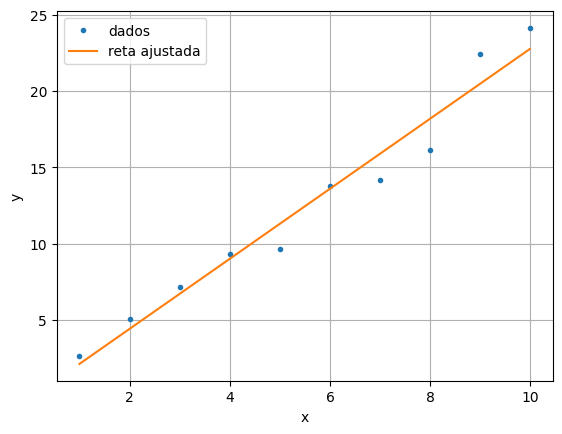

In [5]:
# vamos plotar o resultado

x = np.arange(1, 10.0, 0.01)
# usa os valores *calculados* de a e b
y = a * x + b

pt.plot(dados[:, 0], dados[:, 1], '.')
pt.plot(x, y)
pt.grid()
pt.xlabel('x')
pt.ylabel('y')
pt.legend(['dados', 'reta ajustada'])

In [6]:
# comparando os ajustes
# preencha a0 e b0 com os valores obtidos visualmente no início
a0 = 2.5
b0 = 0.2
residuo1 = np.sum((a0 * dados[:, 0] + b0 - dados[:, 1]) ** 2)
residuo2 = np.sum((a * dados[:, 0] + b - dados[:, 1]) ** 2)
print(f'Resíduo do ajuste visual = {residuo1}')
print(f'Resíduo do ajuste pelo MMQ = {residuo2}')

Resíduo do ajuste visual = 42.56613299999999
Resíduo do ajuste pelo MMQ = 16.340395806060606


## Questões teóricas

1. O sistema linear sempre tem solução única? Em que situação ele não tem (ou tem mais de uma)?
2. Queríamos **minimizar** o resíduo $R$, então tomamos as derivadas parciais e igualamos a 0, mas essas condições não garantem que o ponto encontrado é um mínimo, poderia ser também um máximo, ou um ponto de sela. Que conta precisamos fazer para garantir que encontramos de fato um mínimo?

## Exercício 2: generalizando

Vamos escrever uma função `ajuste_reta()` que, dada uma matriz com 2 colunas, em que a primeira corresponde aos $x_i$ e a segunda aos $y_i$, calcula o melhor ajuste por mínimos quadrados e retorna os coeficientes angular e linear $a$ e $b$ da reta ajustada $ax+b$.

In [7]:
def ajuste_reta(dados):
    # número de pontos (linhas)
    n = dados.shape[0]
    # pegando a 1a coluna, dos xi
    xi = dados[:, 0]
    # pegando a 2a coluna, dos yi
    yi = dados[:, 1]

    # somatório de xi
    sx = np.sum(xi)

    # somatório de xi^2
    sx2 = np.sum(xi**2)

    # somatório de yi
    sy = np.sum(yi)

    # somatório de xi yi
    sxy = np.sum(xi * yi)

    # cálculo dos coeficientes
    a = (n * sxy - sx * sy) / (n * sx2 - (sx**2))
    b = (sx2 * sy - sx * sxy) / (n * sx2 - (sx**2))

    return (a, b)

In [8]:
a, b = ajuste_reta(dados)
print(f'a = {a}, b = {b}')
assert np.abs(a - 2.295448485) < 1e-6 and np.abs(b - (-0.1840666667)) < 1e-6

a = 2.295448484848485, b = -0.18406666666666172
